## 変化点の検出
[deepcharles/ruptures](https://github.com/deepcharles/ruptures)を使用して、時系列データの変化点を検出してみます。

> C. Truong, L. Oudre, N. Vayatis. Selective review of offline change point detection methods. Signal Processing, 167:107299, 2020.

の論文に技術的な詳細が説明されています。

```
BSD 2-Clause License

Copyright (c) 2017-2021, ENS Paris-Saclay, CNRS
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:
* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.
* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE
FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL
DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR
SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER
CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY,
OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
```

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import ruptures as rpt
import seaborn as sns
from full_fred.fred import Fred

# FRED_API_KEY = os.getenv('FRED_API_KEY')
fred = Fred()
print(f"FRED APIキーが環境変数に設定されている：{fred.env_api_key_found()}")


def get_fred_data(name, start="2013-01-01", end=""):
    df = fred.get_series_df(name)[["date", "value"]].copy()
    df["date"] = pd.to_datetime(df["date"])
    df["value"] = pd.to_numeric(df["value"], errors="coerce")
    df = df.set_index("date")

    if end == "":
        df = df.loc[f"{start}":]
    else:
        df = df.loc[f"{start}":f"{end}"]

    return df

FRED APIキーが環境変数に設定されている：True


### FREDのデータを取得
[Retailers: Inventories to Sales Ratio](https://fred.stlouisfed.org/series/RETAILIRSA)のデータの変化点を検出してみます。このデータは棚卸資産と売上高の比率を示しており『1ヶ月の売上高に対して手元にある在庫が何ヶ月分あるか』の目安となる指標です。

In [2]:
df_RETAILIRSA = get_fred_data("RETAILIRSA", start="2000-01-01")

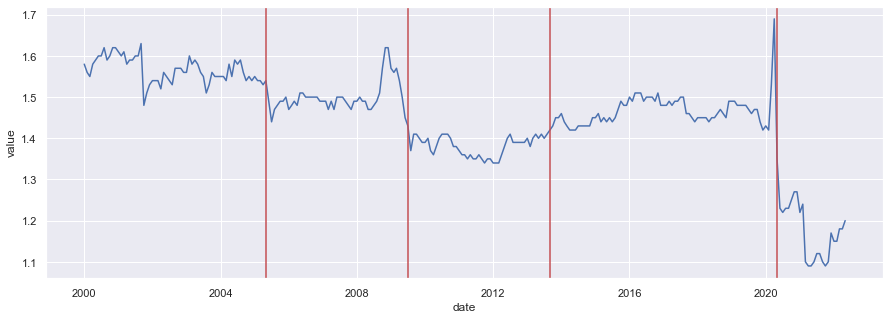

In [3]:
N = len(df_RETAILIRSA["value"])
signal = df_RETAILIRSA["value"].values.reshape((N, 1))

algo = rpt.Pelt(model="rbf").fit(signal)
result = algo.predict(pen=10)

sns.set(rc={"figure.figsize": (15, 5)})
sns.lineplot(data=df_RETAILIRSA, x="date", y="value")
for idx in result[:-1]:
    plt.axvline(x=df_RETAILIRSA.index[idx - 1], color="r")
plt.show()